# Notebook 2: Green Data Python Analysis – Analysis & Modeling
### Topics covered: Regression, More Techniques, Time Series, Data Visualization

First, let's import our packages.

In [1]:
import numpy as np  #for mathematical operations

import scipy as sc #for more advanced mathematical operations

from scipy.stats import chi2_contingency #for chi-squared association tests

import matplotlib.pyplot as plt  #for plotting data

import pandas as pd  #for data analysis

import seaborn as sns #for some statistical vizualizations

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

Import the dataset. You can find it in the Training Resources folder. The title should be 'electricvehiclesampledata.csv', it's up to you to use the correct path and function. Also make sure to remove any missing values, as the code we're going over today can't handle them.

## Simple Linear Regresssion
Simple linear regression is a statistical method used to model the relationship between two variables, where one variable is considered the independent variable (predictor), and the other is the dependent variable (outcome). The primary goal of simple linear regression is to find a linear equation that best describes the relationship between the two variables and allows us to make predictions or inferences.

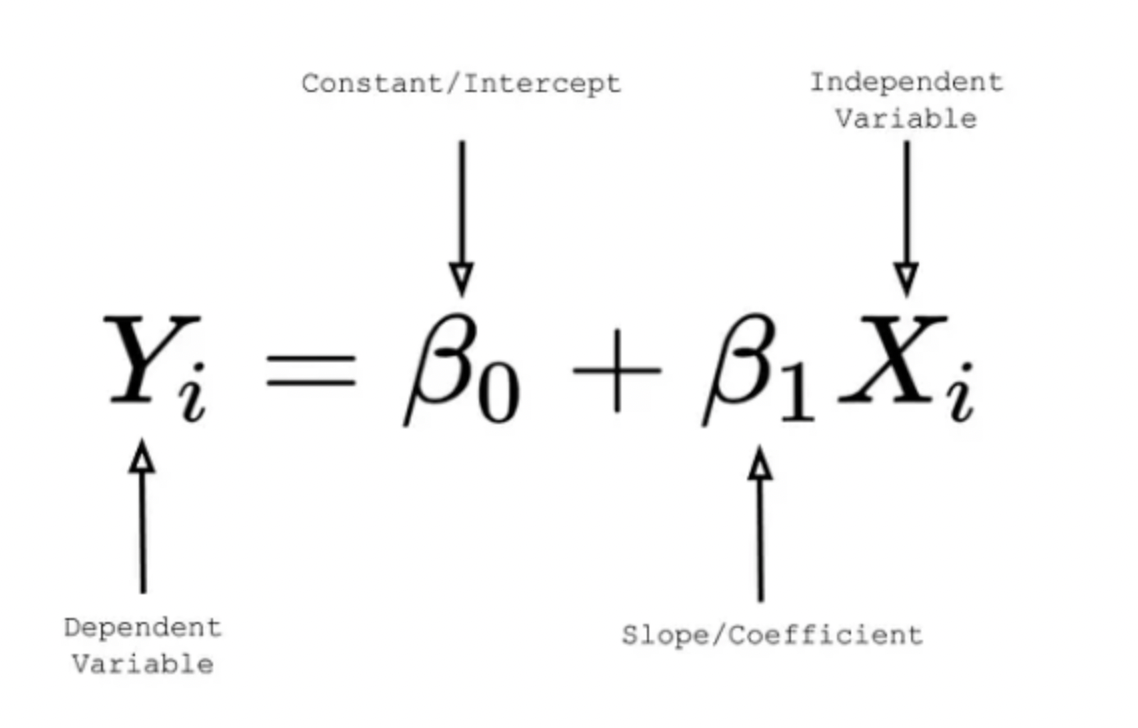

Define your predictor variable and target variable. Hint: You'll need to use double brackets to define them as 2D arrays.

Now we're going to create a Linear Regression Object using the constructor and use .fit() to fit the model and .predict() to output the fitted data.

We can view the intercept (lm.intercept_) and slope (lm.coef_) of our linear regression model:

We can also define a linear relationship between our dependent and independent variables.

Most importantly, we can now predict values that weren't originally in the data. For example, if we wanted to know the prices of cars with a top speed between 275 km/h and 354 km/h, we could predict those values.

### Residual Plot

But how do we know how accurate our data is, or if the relationship between the variables is even linear? We look at the residual plot!

A residual plot is exactly what it sounds like-- it plots the residuals of our linear model. This tells us the accuracy of our model across the entire range of the data.

A residual plot for a linear model should be randomly distributed, centered around the x-axis with similar variance, and have no discernible patterns. If it does have a pattern, such as a funnel or curve shape shown below, this is an indication that a linear model was not appropriate for that data.


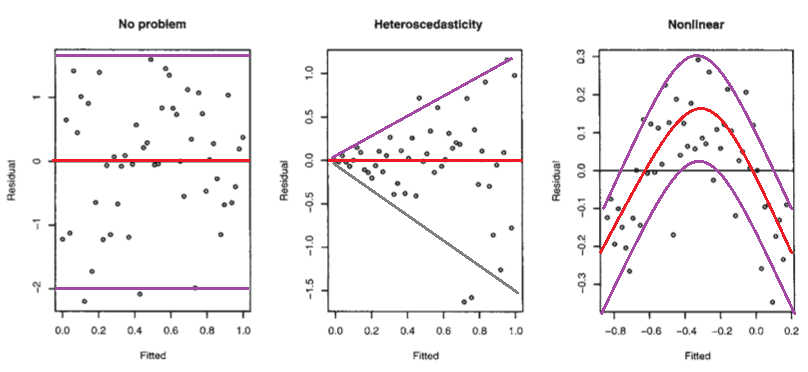

You can create a redisdual plot using seaborn's .residplot function. Just insert your x and y axes as x=df[""] and y=df[""]:

How would you interpret this residual plot?

### Distribution Plots

Another way to check the accuracy of your model is with distribution plots. Distribution plots are especially helpful for identifying over what range your model most closely predicts the actual values in the dataset.

## Multiple Linear Regression
If you need to model a relationship between a dependent variable and two or more independent variables, you can use a multiple linear regression. 

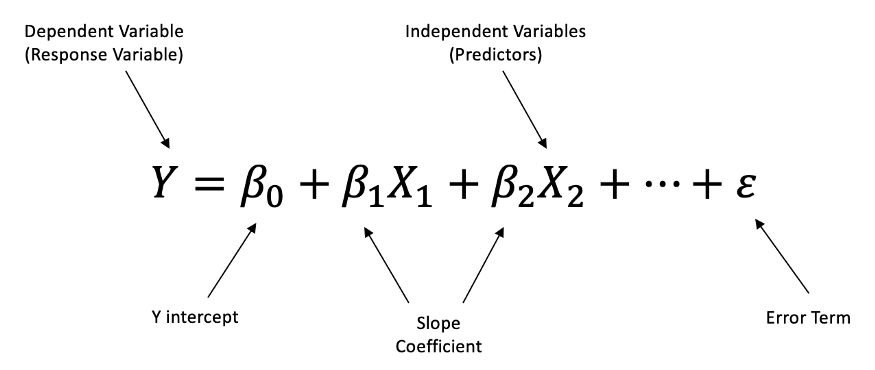

Let's start by visualizing what two predictor variables would look like. The values of each predictor variable would be placed on a 2D plane, then mapped to the corresponding response variable, making it a 3D plane as shown below.

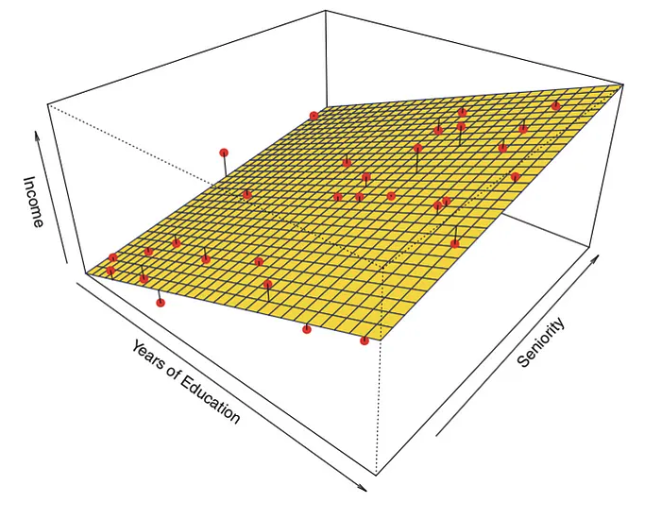

We can store each predictor variable into a single variable...

... and then fit the model as before and obtain a prediction.

Let's see how the additional predictor variables affected the accuracy of our model. Recreate the distribution plot from above for our new Yhat.

As you can see, adding more predictors improves the fit of our model.

## Polynomial Regression
Sometimes your data cannot be represented by a linear relationship. In these cases, your predictors (independent variables) are set to higher orders.

Polynomial Regression is a special case of the general linear regression model, and is useful for describing curvilinear relationships. It does this by squaring or setting higher-order terms of the predictor variables, transforming the data.

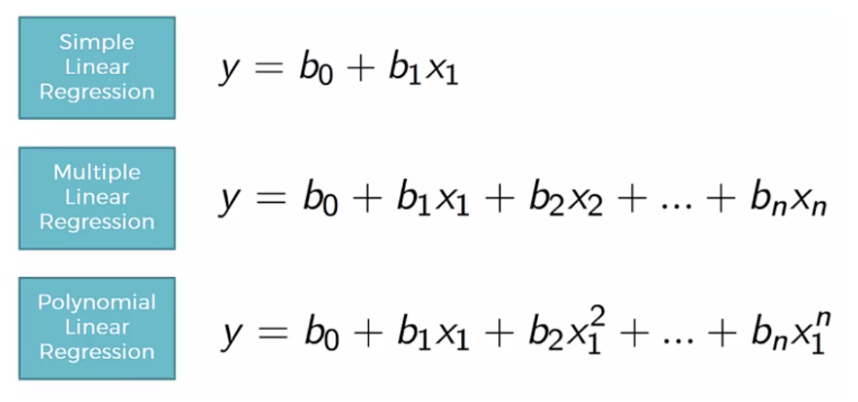

The order of the polynomial regression greatly affects how the graph looks, and generally the higher the order the better the fit. However, the relationship between the variable and the parameter remains linear.

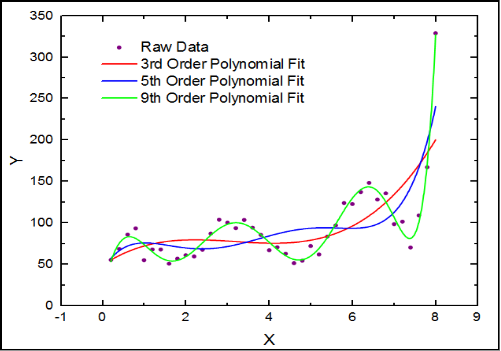

Let's create a 2nd order polynomial regression model to compare to our simple linear regression model:

We're using the same Y value, but we need to convert our X-value into a 2D Numpy array.

Now we need to transform the data to a polynomial expansion. We can do this using the .fit_tranform function from Polynomial Features. First we need to define what order the expansion will be, then assign the transformed data to a new variable.

Once again, let's create a Linear Regression Object using the constructor and use .fit() to fit the model and .predict() to output the fitted data.

Let's see the predictive ability of our model in action. First we need to create a set of new input values using np.arrange and once again make sure it's a 2D array.

Then, like above, we transform them into a polynomial expression and use the polynomial regression model to predict what the output should be:

Let's compare the polynomial regression model to the simple linear regression model we made at first:

Let's create a residual plot for this regression model as well:

## Logistic Regression
You can use a logistic regression to analyze a dataset where the dependent variable is binary, such as "yes/no" or "true/false".

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(x, y)

## Polynomial Regression
Sometimes your data cannot be represented by a linear relationship. In these cases, your predictors (independent variables) are set to higher orders.

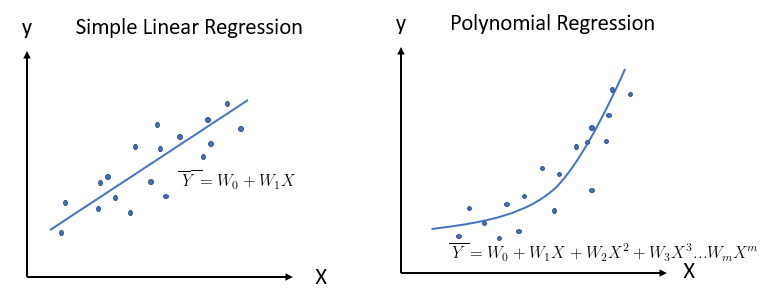

Let's say we want to describe the relationship between Energy Usage and GHG Emissions, but we know that this relationship is not linear, but is instead curvilinear. We want to use a polynomial regression to model this relationship.

Start by defining two objects x and y to each be the data you are trying to correlate.

Then, use the function np.polyfit to construct your polynomial linear regression. This function takes 3 arguments. The first 2 should be pretty obvious. The third argument is the order of your model. Let's start with a third order polynomial regression.

In [ ]:
f = 

Then, use the function np.poly1d to get your parameters. This function takes 1 argument, which is just your outcome from the previous question.

In [ ]:
p = 

This result is an array, which means you can reference it to get each of your parameters.

In [ ]:
#hint: remember that arrays are like matrices and you can use square brackets to access info in them.


Define a function that takes in 4 parameters for a generic third-order polynomial as well as an independent variable.

Using your function and your parameters, use your original x values to plot the experimental data vs your model. Make sure to use plt.scatter and make it a nice plot, with legends and axis labels.

In [1]:
#first, calculate the values using your function


Why does it look terrible? Back your answer up with either a plot or some statistical parameter.

## Time Series (continued)

Let's go back to the Mexico City Air Quality dataset we used in the last notebook to continue or practice with time series. 

First load the dataset, clean it, and handle the missing data with the functions we learned last time.

In [2]:
#remember to also convert your timestamp column to datetime format, so we can run time series analysis on it.


#### Resampling and Aggregation

Now that your data is loaded and ready to be analyzed, let's create daily pollution averages. So, we want to reduce the hourly data to daily means. 

In [4]:
#resample by day
#df_daily = df_clean.resample('D').mean()

#check your datset using .head()


Now try plotting the daily data to see smoother patterns than the plot we made last time.

In [5]:
#you can use plt


#### Relationships between variables
Let's practice checking correlations. Explore how temperature or humidity relate to pollutant levels.

In [ ]:
#calculate the correlation matrix
#corr = df_daily.corr()

#sns.heatmap(corr, annot=True, cmap="coolwarm")
#plt.title("Correlation between Environmental Variables")
#plt.show()

Hint: Positive correlations show variables that move together (e.g., temperature and ozone).

#### Small Forecasting Exercise
Let's try a simple forecasting practice by forecasting the next day's PM2.5 level.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Train-test split
train = df_daily['PM2.5 [ug/m3]'][:-30]
test = df_daily['PM2.5 [ug/m3]'][-30:]

# Fit ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)

plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()
